In [282]:
import numpy as np
import pandas as pd
import xlrd
import xlwt
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import jupyterlab
%matplotlib inline

In [283]:
#training = pd.read_csv('training_data.csv', encoding = "latin")
training = pd.read_csv('rainTrain.csv')

In [284]:
training.shape

(6812, 14)

In [285]:
training.head()

,city_name,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_PRECIPITATION,AVERAGE_CLOUDINESS,AVERAGE_RAIN
0,Porto,2019-08-29 07:00:00,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,0.0,nuvens quebradas,chuva fraca
1,Porto,2018-08-10 14:00:00,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,0.0,céu limpo,chuva fraca
2,Porto,2019-09-01 16:00:00,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,0.0,nuvens quebradas,chuva fraca
3,Porto,2019-02-26 11:00:00,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,0.0,céu limpo,chuva fraca
4,Porto,2019-06-06 12:00:00,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,10.0,0.0,nuvens quebradas,chuva fraca


In [286]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city_name                6812 non-null   object 
 1   record_date              6812 non-null   object 
 2   AVERAGE_SPEED_DIFF       6812 non-null   object 
 3   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64
 4   AVERAGE_TIME_DIFF        6812 non-null   float64
 5   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64
 6   LUMINOSITY               6812 non-null   object 
 7   AVERAGE_TEMPERATURE      6812 non-null   float64
 8   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64
 9   AVERAGE_HUMIDITY         6812 non-null   float64
 10  AVERAGE_WIND_SPEED       6812 non-null   float64
 11  AVERAGE_PRECIPITATION    6812 non-null   float64
 12  AVERAGE_CLOUDINESS       6812 non-null   object 
 13  AVERAGE_RAIN             6812 non-null   object 
dtypes: float64(8), object(6)

In [287]:
training['AVERAGE_DISTANCE_FREE'] = training['AVERAGE_FREE_FLOW_TIME'] * training['AVERAGE_FREE_FLOW_SPEED']

In [288]:
training['AVERAGE_TIME'] = training['AVERAGE_TIME_DIFF'] + training['AVERAGE_FREE_FLOW_TIME'] 

In [289]:
training['AVERAGE_SPEED'] =  training['AVERAGE_DISTANCE_FREE'] / training['AVERAGE_TIME']

In [290]:
training['AVERAGE_SPEED_DIFF_Num'] =  training['AVERAGE_FREE_FLOW_SPEED'] - training['AVERAGE_SPEED']

In [291]:
training.head()

,city_name,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_PRECIPITATION,AVERAGE_CLOUDINESS,AVERAGE_RAIN,AVERAGE_DISTANCE_FREE,AVERAGE_TIME,AVERAGE_SPEED,AVERAGE_SPEED_DIFF_Num
0,Porto,2019-08-29 07:00:00,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,0.0,nuvens quebradas,chuva fraca,2963.10,82.9,35.743064,5.756936
1,Porto,2018-08-10 14:00:00,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,0.0,céu limpo,chuva fraca,3644.58,135.7,26.857627,14.842373
2,Porto,2019-09-01 16:00:00,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,0.0,nuvens quebradas,chuva fraca,3288.72,123.6,26.607767,11.992233
3,Porto,2019-02-26 11:00:00,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,0.0,céu limpo,chuva fraca,3519.34,155.1,22.690780,14.709220
4,Porto,2019-06-06 12:00:00,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,10.0,0.0,nuvens quebradas,chuva fraca,3203.20,127.4,25.142857,16.457143


In [292]:
training['AVERAGE_SPEED_DIFF'].value_counts()

None         2200
Medium       1651
Low          1419
High         1063
Very_High     479
Name: AVERAGE_SPEED_DIFF, dtype: int64

In [293]:
training['AVERAGE_SPEED_DIFF'] = training['AVERAGE_SPEED_DIFF'].astype('category')
training['AVERAGE_RAIN'] = training['AVERAGE_RAIN'].astype('category')

In [294]:
training['city_name'].value_counts()

Porto    6812
Name: city_name, dtype: int64

In [295]:
training['LUMINOSITY'].value_counts()

LIGHT        3293
DARK         3253
LOW_LIGHT     266
Name: LUMINOSITY, dtype: int64

In [296]:
training['AVERAGE_CLOUDINESS'].value_counts()

nuvens quebradas     4272
céu limpo            1890
céu pouco nublado     516
nublado               134
Name: AVERAGE_CLOUDINESS, dtype: int64

In [297]:
training['AVERAGE_RAIN'].value_counts()

chuva fraca          6500
chuva moderada        160
chuva leve             52
aguaceiros fracos      38
chuva                  33
aguaceiros             16
chuva forte            13
Name: AVERAGE_RAIN, dtype: int64

In [298]:
training.describe()

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_PRECIPITATION,AVERAGE_DISTANCE_FREE,AVERAGE_TIME,AVERAGE_SPEED,AVERAGE_SPEED_DIFF_Num
count,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.0,6812.000000,6812.000000,6812.000000,6.812000e+03
mean,40.661010,25.637111,81.143952,16.193482,1017.388139,80.084190,3.058573,0.0,3291.883629,106.781063,33.242410,7.418600e+00
std,4.119023,33.510507,8.294401,5.163492,5.751061,18.238863,2.138421,0.0,413.668194,34.963319,8.696429,7.499522e+00
min,30.500000,0.000000,46.400000,0.000000,985.000000,14.000000,0.000000,0.0,1647.200000,48.100000,8.772108,-7.105427e-15
25%,37.600000,2.275000,75.400000,13.000000,1015.000000,69.750000,1.000000,0.0,3024.030000,84.000000,26.610483,1.163352e+00
50%,40.700000,12.200000,82.400000,16.000000,1017.000000,83.000000,3.000000,0.0,3342.710000,95.600000,33.951761,5.116578e+00
75%,43.500000,36.200000,87.400000,19.000000,1021.000000,93.000000,4.000000,0.0,3593.520000,121.300000,40.600000,1.157550e+01
max,55.900000,296.500000,112.000000,35.000000,1033.000000,100.000000,14.000000,0.0,4751.320000,369.900000,55.600000,3.799432e+01


In [299]:
trainingWork = training.copy()

In [300]:
trainingWork['record_date'] = pd.to_datetime(trainingWork['record_date'])

trainingWork['weekday'] = trainingWork['record_date'].dt.dayofweek
trainingWork['hour'] = trainingWork['record_date'].dt.hour
trainingWork['month'] = trainingWork['record_date'].dt.month
trainingWork['year'] = trainingWork['record_date'].dt.year
trainingWork['day'] = trainingWork['record_date'].dt.day

In [301]:
def applyer(row):
    if row == 5 or row == 6:
        return 1
    else:
        return 0 
temp2 = trainingWork['weekday'].apply(applyer) 
trainingWork['weekend']=temp2

In [302]:
#trainingWork = trainingWork.drop(['city_name','record_date','AVERAGE_PRECIPITATION'],axis=1)

In [303]:
#sns.pairplot(trainingWork)

Prediction Target:

 2   AVERAGE_SPEED_DIFF       6812 non-null   object 

Possibilities:

None         2200
Medium       1651
Low          1419
High         1063
Very_High     479
 

Features:

 0   city_name                6812 non-null   object 
 
 1   record_date              6812 non-null   object ----> All the same value 'Porto' -> Remove

 3   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64
 4   AVERAGE_TIME_DIFF        6812 non-null   float64
 5   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64


 6   LUMINOSITY               6812 non-null   object ----> categorical
LIGHT        3293
DARK         3253
LOW_LIGHT     266


 7   AVERAGE_TEMPERATURE      6812 non-null   float64
 8   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64
 9   AVERAGE_HUMIDITY         6812 non-null   float64
 10  AVERAGE_WIND_SPEED       6812 non-null   float64

 11  AVERAGE_CLOUDINESS       4130 non-null   object
céu claro            1582
céu pouco nublado     516
nuvens dispersas      459
nuvens quebrados      448
algumas nuvens        422
nuvens quebradas      416
céu limpo             153
tempo nublado          67
nublado                67

Missing data -> 39.4% ---> Mode? Removal? over/under Fitting?

 
 12  AVERAGE_PRECIPITATION    6812 non-null   float64 --> All same values -> Remove
 
 13  AVERAGE_RAIN             563 non-null    object 
chuva fraca                    261
chuva moderada                 153
chuva leve                      45
aguaceiros fracos               38
chuva                           30
aguaceiros                      11
chuva forte                      8
trovoada com chuva leve          7
chuvisco fraco                   5
chuva de intensidade pesado      2
chuva de intensidade pesada      1
trovoada com chuva               1
chuvisco e chuva fraca           1

Missing data -> 91.7% ----> Removal

In [304]:
corr = trainingWork.copy()

corr['AVERAGE_RAIN']=corr['AVERAGE_RAIN'].astype('category').cat.codes
corr['AVERAGE_RAIN'].sort_values(ascending=False)

corr['AVERAGE_CLOUDINESS']=corr['AVERAGE_CLOUDINESS'].astype('category').cat.codes
corr['AVERAGE_CLOUDINESS'].sort_values(ascending=False)

corr['AVERAGE_SPEED_DIFF']=corr['AVERAGE_SPEED_DIFF'].astype('category').cat.codes
corr['AVERAGE_SPEED_DIFF'].sort_values(ascending=False)

corr['LUMINOSITY']=corr['LUMINOSITY'].astype('category').cat.codes
corr['LUMINOSITY'].sort_values(ascending=False)



2396    2
6185    2
2072    2
2078    2
4049    2
       ..
4105    0
4106    0
4107    0
4109    0
6811    0
Name: LUMINOSITY, Length: 6812, dtype: int8

<AxesSubplot:>

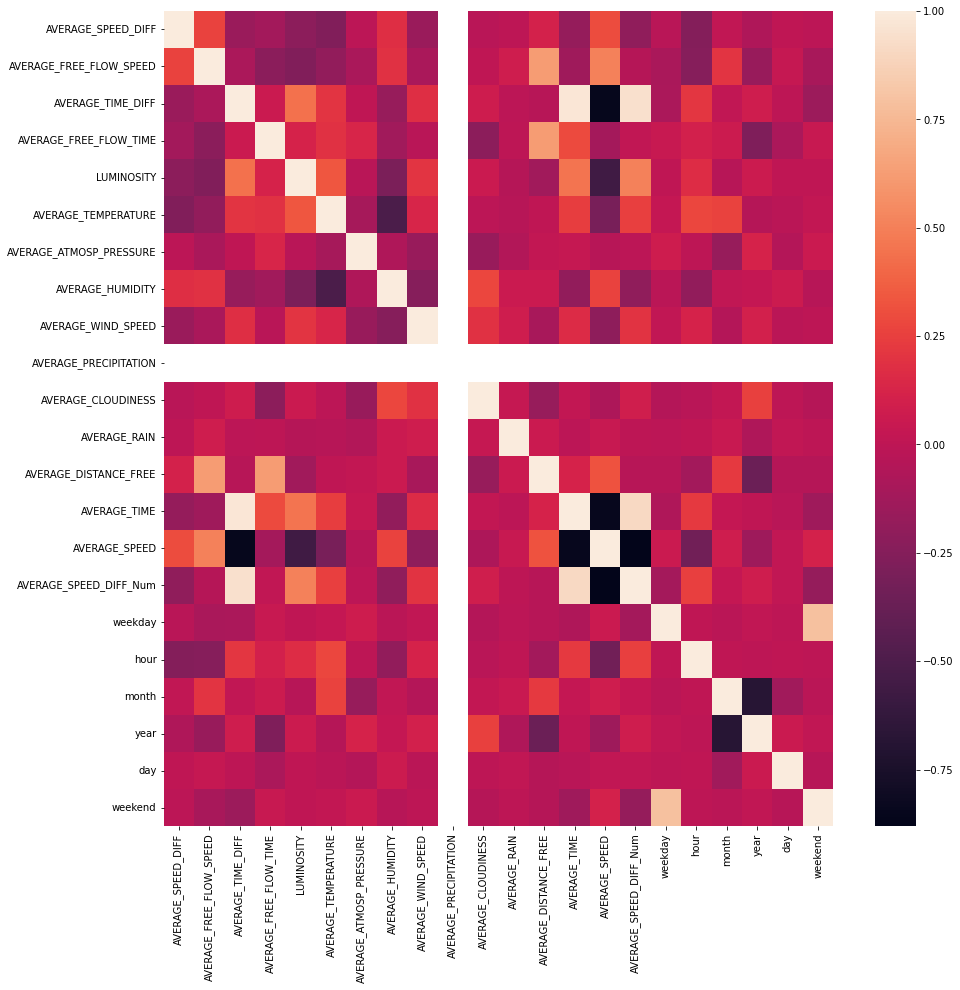

In [305]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr.corr())

In [306]:
#trainingWork['AVERAGE_WIND_SPEED'] = np.log(trainingWork.AVERAGE_WIND_SPEED+1)
#trainingWork['AVERAGE_TIME_DIFF'] = np.log(trainingWork.AVERAGE_TIME_DIFF+1)


Numerical values:  

AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64  
AVERAGE_TIME_DIFF        6812 non-null   float64  
AVERAGE_FREE_FLOW_TIME   6812 non-null   float64  
AVERAGE_TEMPERATURE      6812 non-null   float64  
AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64  
AVERAGE_HUMIDITY         6812 non-null   float64  
AVERAGE_WIND_SPEED       6812 non-null   float64  
AVERAGE_PRECIPITATION    6812 non-null   float64  
weekday                  6812 non-null   int64    
hour                     6812 non-null   int64    
month                    6812 non-null   int64    

Categorical Values  
city_name                6812 non-null   object  
record_date              6812 non-null   object  
AVERAGE_SPEED_DIFF       6812 non-null   object   
LUMINOSITY               6812 non-null   object   
AVERAGE_CLOUDINESS       4130 non-null   object   
AVERAGE_RAIN             563 non-null    object   

In [307]:
trainingWork.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   city_name                6812 non-null   object        
 1   record_date              6812 non-null   datetime64[ns]
 2   AVERAGE_SPEED_DIFF       6812 non-null   category      
 3   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64       
 4   AVERAGE_TIME_DIFF        6812 non-null   float64       
 5   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64       
 6   LUMINOSITY               6812 non-null   object        
 7   AVERAGE_TEMPERATURE      6812 non-null   float64       
 8   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64       
 9   AVERAGE_HUMIDITY         6812 non-null   float64       
 10  AVERAGE_WIND_SPEED       6812 non-null   float64       
 11  AVERAGE_PRECIPITATION    6812 non-null   float64       
 12  AVERAGE_CLOUDINESS       6812 non-

In [308]:
df_num = trainingWork[['AVERAGE_FREE_FLOW_SPEED','AVERAGE_TIME_DIFF','AVERAGE_FREE_FLOW_TIME','AVERAGE_TEMPERATURE','AVERAGE_ATMOSP_PRESSURE','AVERAGE_HUMIDITY','AVERAGE_WIND_SPEED','AVERAGE_PRECIPITATION','weekday','hour','month','year','AVERAGE_DISTANCE_FREE','AVERAGE_TIME','AVERAGE_SPEED','AVERAGE_SPEED_DIFF_Num']]

df_cat = trainingWork[['AVERAGE_SPEED_DIFF','LUMINOSITY','AVERAGE_CLOUDINESS','AVERAGE_RAIN']]

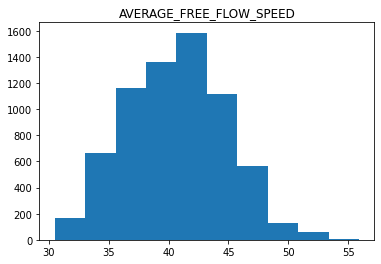

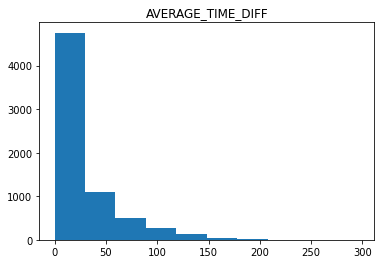

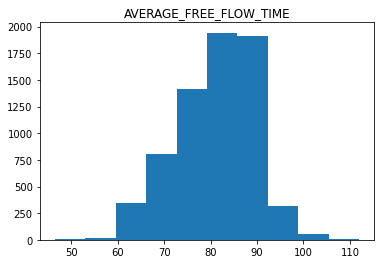

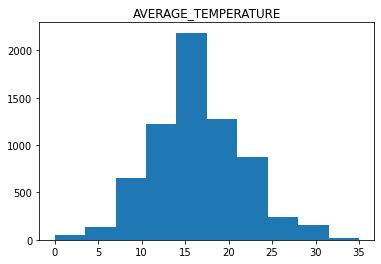

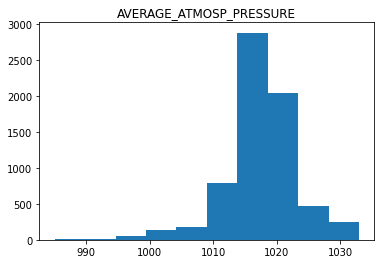

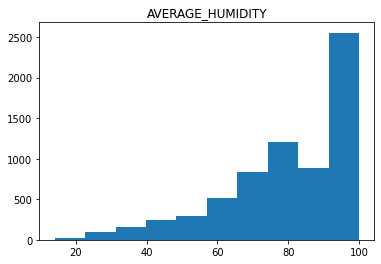

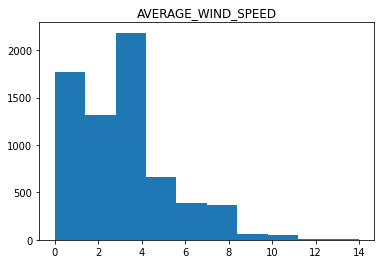

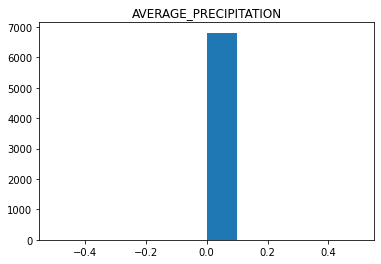

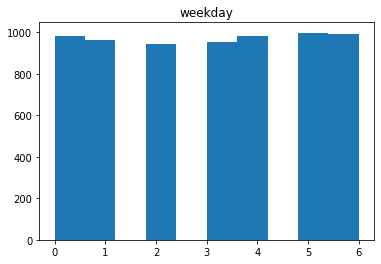

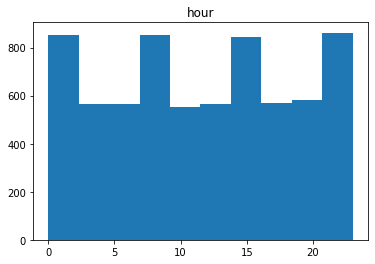

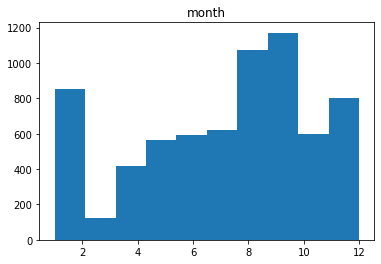

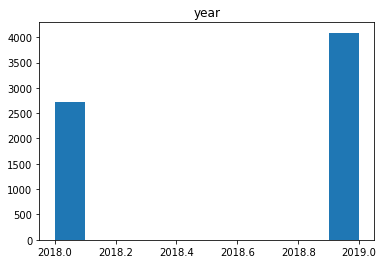

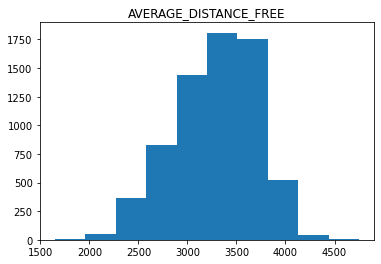

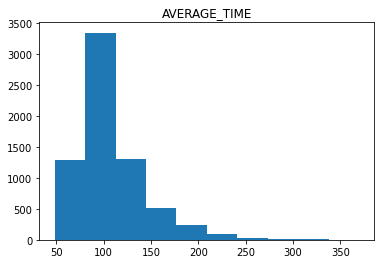

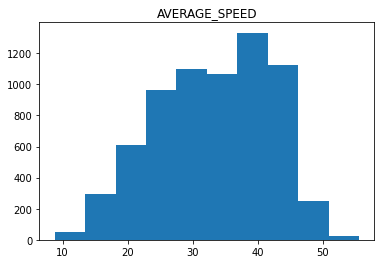

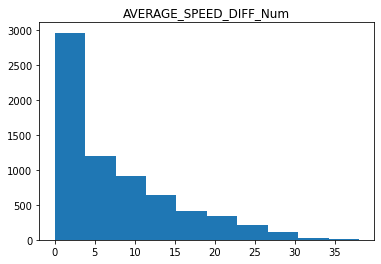

In [309]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

                         AVERAGE_FREE_FLOW_SPEED  AVERAGE_TIME_DIFF  \
AVERAGE_FREE_FLOW_SPEED                 1.000000          -0.083653   
AVERAGE_TIME_DIFF                      -0.083653           1.000000   
AVERAGE_FREE_FLOW_TIME                 -0.219890           0.055194   
AVERAGE_TEMPERATURE                    -0.192325           0.205935   
AVERAGE_ATMOSP_PRESSURE                -0.093648           0.006243   
AVERAGE_HUMIDITY                        0.191598          -0.173598   
AVERAGE_WIND_SPEED                     -0.092909           0.169855   
AVERAGE_PRECIPITATION                        NaN                NaN   
weekday                                -0.087912          -0.085474   
hour                                   -0.247337           0.207378   
month                                   0.200550           0.010306   
year                                   -0.164433           0.074928   
AVERAGE_DISTANCE_FREE                   0.621077          -0.034005   
AVERAG

<AxesSubplot:>

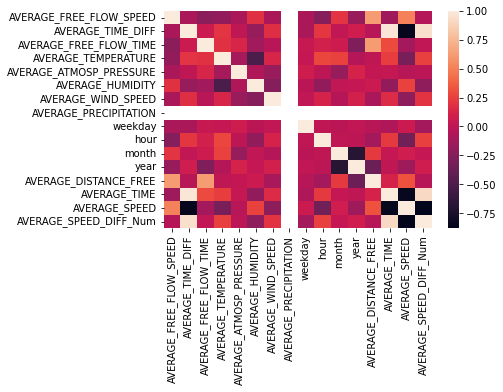

In [310]:
print(df_num.corr())
sns.heatmap(df_num.corr())

In [311]:
pd.pivot_table(trainingWork, index= 'AVERAGE_SPEED_DIFF', values=df_num)

,AVERAGE_ATMOSP_PRESSURE,AVERAGE_DISTANCE_FREE,AVERAGE_FREE_FLOW_SPEED,AVERAGE_FREE_FLOW_TIME,AVERAGE_HUMIDITY,AVERAGE_PRECIPITATION,AVERAGE_SPEED,AVERAGE_SPEED_DIFF_Num,AVERAGE_TEMPERATURE,AVERAGE_TIME,AVERAGE_TIME_DIFF,AVERAGE_WIND_SPEED,hour,month,weekday,year
AVERAGE_SPEED_DIFF,,,,,,,,,,,,,,,,
High,1017.357479,3255.291552,39.588147,82.376952,73.802916,0.0,23.413224,16.174922,18.632173,146.178457,63.801505,3.817498,14.806209,7.038570,2.713076,2018.665099
Low,1017.498238,3261.511156,40.480479,80.716561,81.341790,0.0,36.545859,3.934620,16.227625,90.021705,9.305144,2.998591,11.643411,7.096547,3.418605,2018.618746
Medium,1017.431254,3222.723998,38.831617,83.270139,74.528770,0.0,30.006639,8.824979,17.992732,109.924833,26.654694,3.407632,13.711084,7.057541,2.943065,2018.614173
None,1017.417273,3359.646986,41.874818,80.205182,86.367273,0.0,41.120961,0.753857,13.888182,81.798727,1.593545,2.422727,8.310909,7.120000,3.155455,2018.537727
Very_High,1016.847599,3390.211566,44.307307,76.656994,80.588727,0.0,20.236719,24.070588,15.066806,172.903967,96.246973,3.269311,11.254697,7.144050,2.200418,2018.638831


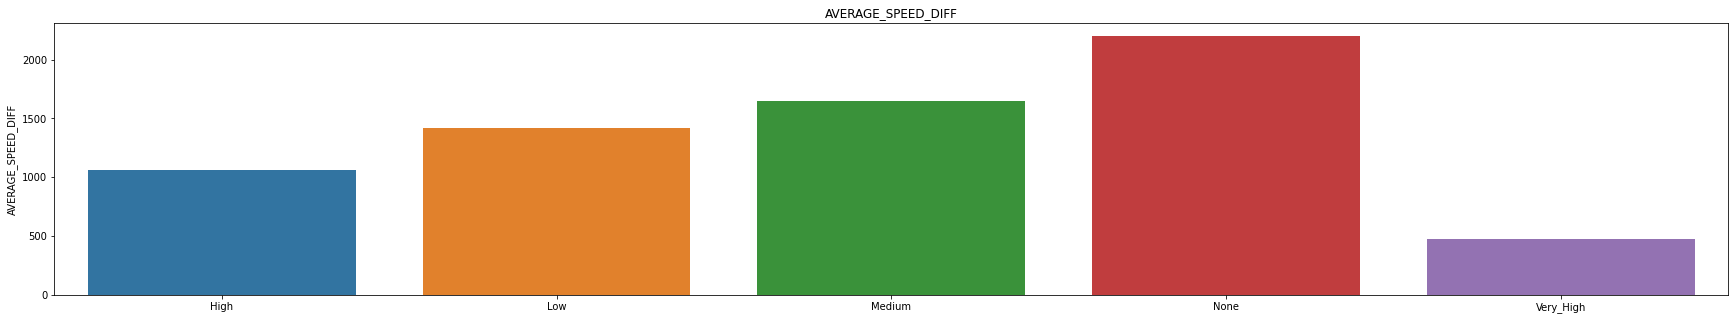

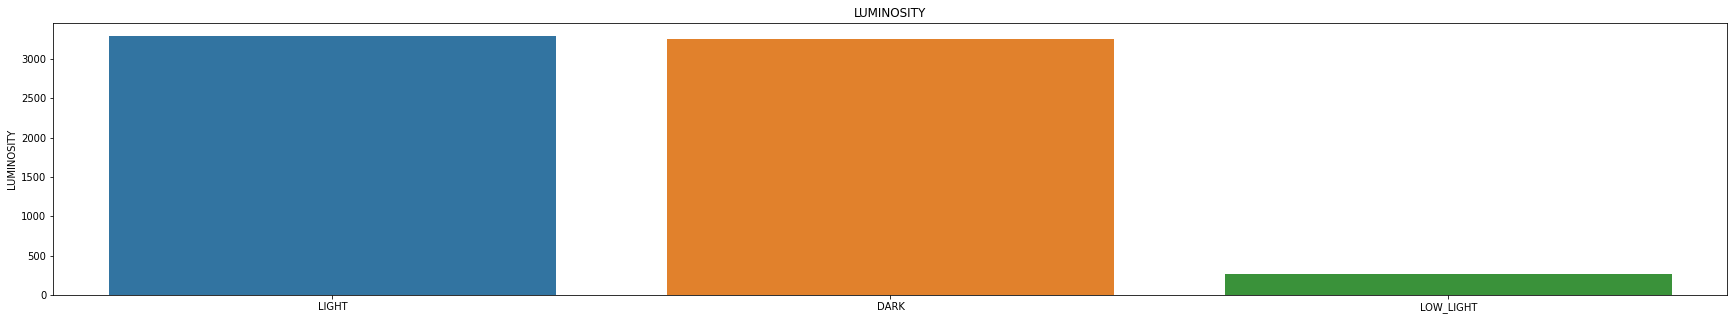

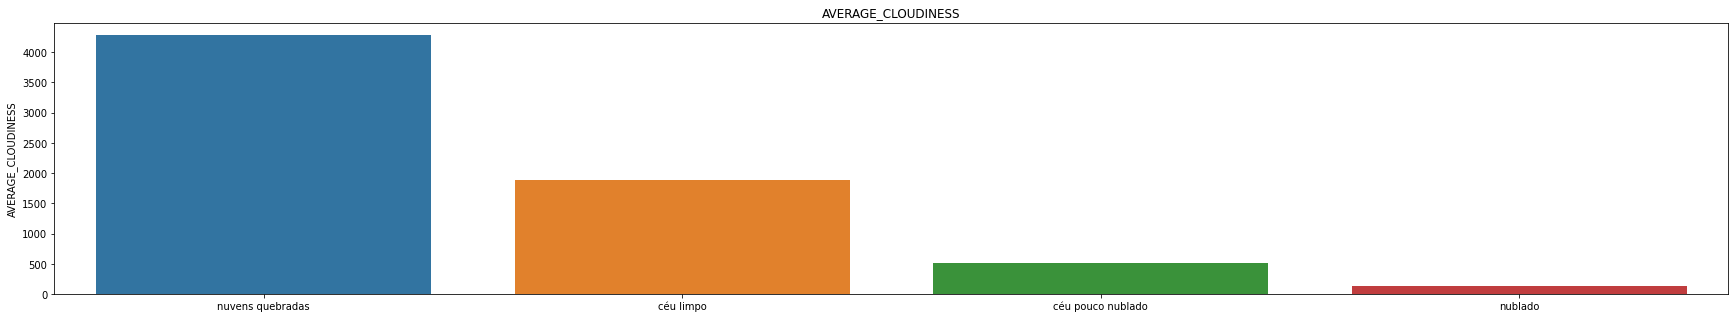

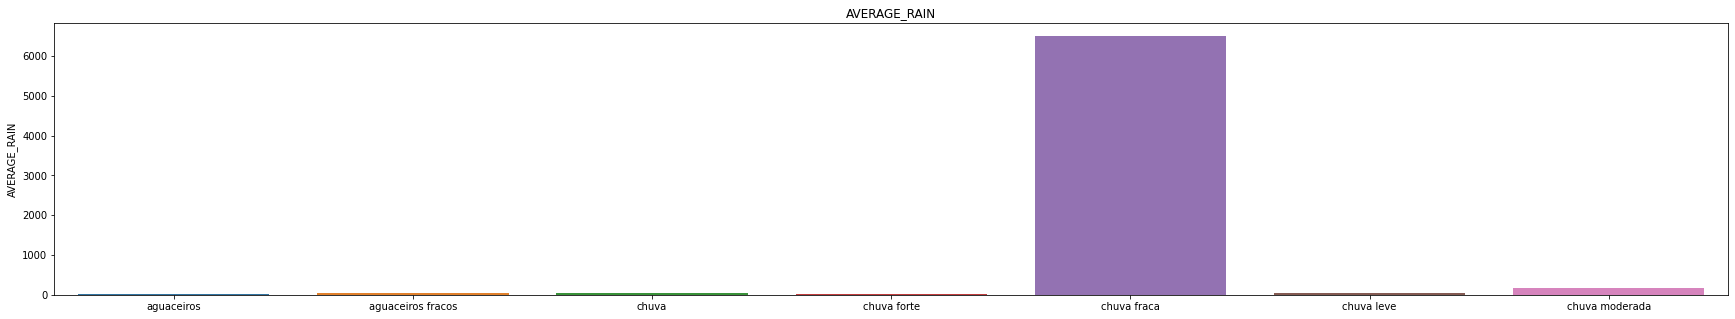

In [312]:
for i in df_cat.columns:
    fig, ax = plt.subplots(figsize=(30,5))
    sns.barplot(x=df_cat[i].value_counts().index,y= df_cat[i].value_counts()).set_title(i)
    plt.show()

In [313]:


# Compare Speed Diff and each of these categorical variables 

print(pd.pivot_table(trainingWork, index = 'AVERAGE_SPEED_DIFF', columns = 'LUMINOSITY', values='month' ,aggfunc ='count'))
print()
print(pd.pivot_table(trainingWork, index = 'AVERAGE_SPEED_DIFF', columns = 'AVERAGE_CLOUDINESS', values='month' ,aggfunc ='count'))
print()
print(pd.pivot_table(trainingWork, index = 'AVERAGE_SPEED_DIFF', columns = 'AVERAGE_RAIN',values='month',aggfunc ='count'))



LUMINOSITY          DARK  LIGHT  LOW_LIGHT
AVERAGE_SPEED_DIFF                        
High                 149    877         37
Low                  840    518         61
Medium               330   1256         65
None                1897    237         66
Very_High             37    405         37

AVERAGE_CLOUDINESS  céu limpo  céu pouco nublado  nublado  nuvens quebradas
AVERAGE_SPEED_DIFF                                                         
High                      220                133       11               699
Low                       393                105       30               891
Medium                    428                161       21              1041
None                      762                 80       64              1294
Very_High                  87                 37        8               347

AVERAGE_RAIN        aguaceiros  aguaceiros fracos  chuva  chuva forte  \
AVERAGE_SPEED_DIFF                                                      
High               

In [314]:
#trainingWork['AVERAGE_CLOUDINESS'] = trainingWork['AVERAGE_CLOUDINESS'].fillna(trainingWork['AVERAGE_CLOUDINESS'].mode()[0])
#trainingWork['AVERAGE_CLOUDINESS'] = trainingWork['AVERAGE_CLOUDINESS'].fillna('Not Available')

In [315]:
trainingWork.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   city_name                6812 non-null   object        
 1   record_date              6812 non-null   datetime64[ns]
 2   AVERAGE_SPEED_DIFF       6812 non-null   category      
 3   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64       
 4   AVERAGE_TIME_DIFF        6812 non-null   float64       
 5   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64       
 6   LUMINOSITY               6812 non-null   object        
 7   AVERAGE_TEMPERATURE      6812 non-null   float64       
 8   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64       
 9   AVERAGE_HUMIDITY         6812 non-null   float64       
 10  AVERAGE_WIND_SPEED       6812 non-null   float64       
 11  AVERAGE_PRECIPITATION    6812 non-null   float64       
 12  AVERAGE_CLOUDINESS       6812 non-

In [316]:
#trainingWorkDropCloudNa = trainingWork[trainingWork['AVERAGE_CLOUDINESS'].notna()]

In [317]:
#trainingWorkDropCloudNa.info()

In [318]:

df_dummies = trainingWork[['LUMINOSITY','AVERAGE_CLOUDINESS']]

In [319]:
dummied = trainingWork.copy()

In [320]:
for i in df_dummies:
    dummied = pd.concat([dummied,pd.get_dummies(dummied[i])],axis='columns').drop([i],axis='columns')

In [321]:
dummied.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   city_name                6812 non-null   object        
 1   record_date              6812 non-null   datetime64[ns]
 2   AVERAGE_SPEED_DIFF       6812 non-null   category      
 3   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64       
 4   AVERAGE_TIME_DIFF        6812 non-null   float64       
 5   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64       
 6   AVERAGE_TEMPERATURE      6812 non-null   float64       
 7   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64       
 8   AVERAGE_HUMIDITY         6812 non-null   float64       
 9   AVERAGE_WIND_SPEED       6812 non-null   float64       
 10  AVERAGE_PRECIPITATION    6812 non-null   float64       
 11  AVERAGE_RAIN             6812 non-null   category      
 12  AVERAGE_DISTANCE_FREE    6812 non-

In [322]:
finalTrain = dummied.drop(['city_name','record_date','AVERAGE_PRECIPITATION','AVERAGE_RAIN','AVERAGE_FREE_FLOW_SPEED','AVERAGE_FREE_FLOW_TIME','AVERAGE_DISTANCE_FREE'],axis=1)

In [323]:
finalTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   AVERAGE_SPEED_DIFF       6812 non-null   category
 1   AVERAGE_TIME_DIFF        6812 non-null   float64 
 2   AVERAGE_TEMPERATURE      6812 non-null   float64 
 3   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64 
 4   AVERAGE_HUMIDITY         6812 non-null   float64 
 5   AVERAGE_WIND_SPEED       6812 non-null   float64 
 6   AVERAGE_TIME             6812 non-null   float64 
 7   AVERAGE_SPEED            6812 non-null   float64 
 8   AVERAGE_SPEED_DIFF_Num   6812 non-null   float64 
 9   weekday                  6812 non-null   int64   
 10  hour                     6812 non-null   int64   
 11  month                    6812 non-null   int64   
 12  year                     6812 non-null   int64   
 13  day                      6812 non-null   int64   
 14  weekend 

In [324]:
finalTrain['AVERAGE_SPEED_DIFF'].value_counts()

None         2200
Medium       1651
Low          1419
High         1063
Very_High     479
Name: AVERAGE_SPEED_DIFF, dtype: int64

In [325]:
#finalTrain['AVERAGE_SPEED_DIFF'] = finalTrain['AVERAGE_SPEED_DIFF'].map(lambda x: '0' if 'None' in x else "1" if 'Low' in x else '2' if 'Medium' in x else '4' if 'Very_High' in x else '3' if 'Very' in x else "")

#finalTrain.loc[finalTrain.AVERAGE_SPEED_DIFF == 'None', 'AVERAGE_SPEED_DIFF'] = 0
#finalTrain.loc[finalTrain.AVERAGE_SPEED_DIFF == 'Low', 'AVERAGE_SPEED_DIFF'] = 1
#finalTrain.loc[finalTrain.AVERAGE_SPEED_DIFF == 'Medium', 'AVERAGE_SPEED_DIFF'] = 2
#finalTrain.loc[finalTrain.AVERAGE_SPEED_DIFF == 'High', 'AVERAGE_SPEED_DIFF'] = 3
#finalTrain.loc[finalTrain.AVERAGE_SPEED_DIFF == 'Very_High', 'AVERAGE_SPEED_DIFF'] = 4

In [326]:
finalTrain['AVERAGE_SPEED_DIFF'].value_counts()

None         2200
Medium       1651
Low          1419
High         1063
Very_High     479
Name: AVERAGE_SPEED_DIFF, dtype: int64

In [327]:
finalTrain = finalTrain.reindex(sorted(finalTrain.columns), axis=1)

In [328]:
finalTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64 
 1   AVERAGE_HUMIDITY         6812 non-null   float64 
 2   AVERAGE_SPEED            6812 non-null   float64 
 3   AVERAGE_SPEED_DIFF       6812 non-null   category
 4   AVERAGE_SPEED_DIFF_Num   6812 non-null   float64 
 5   AVERAGE_TEMPERATURE      6812 non-null   float64 
 6   AVERAGE_TIME             6812 non-null   float64 
 7   AVERAGE_TIME_DIFF        6812 non-null   float64 
 8   AVERAGE_WIND_SPEED       6812 non-null   float64 
 9   DARK                     6812 non-null   uint8   
 10  LIGHT                    6812 non-null   uint8   
 11  LOW_LIGHT                6812 non-null   uint8   
 12  céu limpo                6812 non-null   uint8   
 13  céu pouco nublado        6812 non-null   uint8   
 14  day     

In [329]:

X = finalTrain.drop(['AVERAGE_SPEED_DIFF'],axis=1)

y = finalTrain['AVERAGE_SPEED_DIFF']


In [330]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE 
from imblearn.combine import SMOTEENN 
from imblearn.combine import SMOTETomek 

In [331]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=2021,stratify=y)

In [332]:
smote = SMOTE()

In [333]:
'''
ros = RandomOverSampler(sampling_strategy="not majority",random_state=2021)
X_res, y_res = ros.fit_resample(X_train, y_train)
#y_res.value_counts()
'''

'\nros = RandomOverSampler(sampling_strategy="not majority",random_state=2021)\nX_res, y_res = ros.fit_resample(X_train, y_train)\n#y_res.value_counts()\n'

In [334]:
from sklearn.preprocessing import StandardScaler

In [335]:
scaler = StandardScaler()

In [336]:
#smote = SMOTE(sampling_strategy="not majority",random_state=2021)
#X_res, y_res = smote.fit_resample(X_train, y_train)

In [337]:
#sm = BorderlineSMOTE(random_state=2021,kind='borderline-2')
#X_res, y_res = sm.fit_resample(X_train, y_train)

In [339]:
sme = SMOTEENN(random_state=2021,sampling_strategy='not majority')
X_res, y_res = sme.fit_resample(X_train, y_train)

In [340]:
#smt = SMOTETomek(random_state=2021,sampling_strategy='auto')
#X_res, y_res = smt.fit_resample(X_train, y_train)

In [341]:
#sm = SVMSMOTE(random_state=2021,sampling_strategy="not majority")
#X_res, y_res = sm.fit_resample(X_train, y_train)

In [342]:
X_res[['AVERAGE_ATMOSP_PRESSURE','AVERAGE_HUMIDITY','AVERAGE_TEMPERATURE','AVERAGE_TIME_DIFF','AVERAGE_WIND_SPEED','AVERAGE_TIME','AVERAGE_SPEED','AVERAGE_SPEED_DIFF_Num']] = scaler.fit_transform(X_res[['AVERAGE_ATMOSP_PRESSURE','AVERAGE_HUMIDITY','AVERAGE_TEMPERATURE','AVERAGE_TIME_DIFF','AVERAGE_WIND_SPEED','AVERAGE_TIME','AVERAGE_SPEED','AVERAGE_SPEED_DIFF_Num']])
X_test[['AVERAGE_ATMOSP_PRESSURE','AVERAGE_HUMIDITY','AVERAGE_TEMPERATURE','AVERAGE_TIME_DIFF','AVERAGE_WIND_SPEED','AVERAGE_TIME','AVERAGE_SPEED','AVERAGE_SPEED_DIFF_Num']] = scaler.transform(X_test[['AVERAGE_ATMOSP_PRESSURE','AVERAGE_HUMIDITY','AVERAGE_TEMPERATURE','AVERAGE_TIME_DIFF','AVERAGE_WIND_SPEED','AVERAGE_TIME','AVERAGE_SPEED','AVERAGE_SPEED_DIFF_Num']])

<AxesSubplot:ylabel='AVERAGE_SPEED_DIFF'>

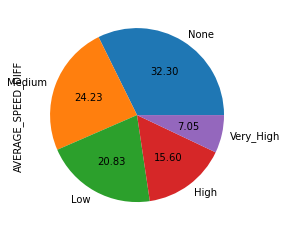

In [343]:
y_train.value_counts().plot.pie(autopct='%.2f')

<AxesSubplot:ylabel='AVERAGE_SPEED_DIFF'>

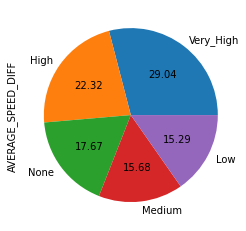

In [344]:
y_res.value_counts().plot.pie(autopct='%.2f')

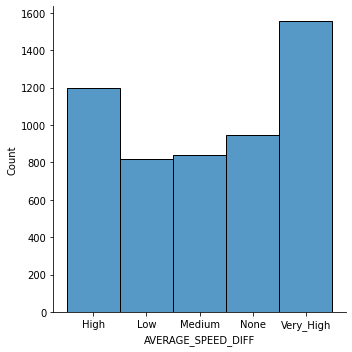

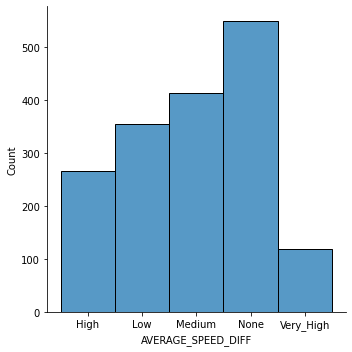

In [345]:
sns.displot(y_res)
sns.displot(y_test)

In [346]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [347]:
#I usually use Naive Bayes as a baseline for my classification tasks 

gnb = GaussianNB()
cv = cross_val_score(gnb,X_res,y_res,cv=5)
print(cv)
print(cv.mean())


[0.76026119 0.86287313 0.82276119 0.80392157 0.82446312]
0.8148560419192552


In [348]:

lr = LogisticRegression(random_state=2021,max_iter = 90000000000000,n_jobs=-1)
cv = cross_val_score(lr,X_res,y_res,cv=5)
print(cv)
print(cv.mean())


[0.89179104 0.91231343 0.90858209 0.90569561 0.8907563 ]
0.9018276962526304


In [349]:

dt = tree.DecisionTreeClassifier(random_state=2021)
cv = cross_val_score(dt,X_res,y_res,cv=5)
print(cv)
print(cv.mean())


[0.9113806  0.91884328 0.93470149 0.92156863 0.92810458]
0.9229197151497415


In [350]:

knn = KNeighborsClassifier(n_jobs=-1)
cv = cross_val_score(knn,X_res.values,y_res.values,cv=5)
print(cv)
print(cv.mean())


[0.79291045 0.77518657 0.78824627 0.78151261 0.80952381]
0.7894759396295832


In [351]:
rf = RandomForestClassifier(random_state=2021,n_jobs=-1)
cv = cross_val_score(rf,X_res,y_res,cv=5)
print(cv)
print(cv.mean())

[0.9505597  0.95708955 0.97014925 0.94677871 0.95144725]
0.9552048929024346


In [352]:
'''
svc = SVC(probability = True,random_state=2021)
cv = cross_val_score(svc,X_res,y_res,cv=5)
print(cv)
print(cv.mean())
'''

'\nsvc = SVC(probability = True,random_state=2021)\ncv = cross_val_score(svc,X_res,y_res,cv=5)\nprint(cv)\nprint(cv.mean())\n'

In [353]:

from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=2021,n_jobs=-1)
cv = cross_val_score(xgb,X_res,y_res,cv=5)
print(cv)
print(cv.mean())


[03:03:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Krow\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Krow\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:03:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Krow\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:03:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Krow\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:03:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Krow\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:03:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.95615672 0.95242537 0.96921642 0.9589169  0.95985061]
0.9593132028930975


In [354]:
#from sklearn.ensemble import VotingClassifier
#voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc),('xgb',xgb)], voting = 'soft',n_jobs=-1) 

In [355]:
'''
cv = cross_val_score(voting_clf,X_res.values,y_res.values,cv=5)
print(cv)
print(cv.mean())
'''

'\ncv = cross_val_score(voting_clf,X_res.values,y_res.values,cv=5)\nprint(cv)\nprint(cv.mean())\n'

In [356]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

In [357]:
#simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [358]:

param_grid = {'max_iter' : [200000000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_res,y_res)
clf_performance(best_clf_lr,'Logistic Regression')


Fitting 5 folds for each of 40 candidates, totalling 200 fits


C:\Users\Krow\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


Logistic Regression
Best Score: 0.846959530080689
Best Parameters: {'C': 29.763514416313132, 'max_iter': 200000000, 'penalty': 'l1', 'solver': 'liblinear'}


In [359]:

param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_res,y_res.values)
clf_performance(best_clf_knn,'KNN')


Fitting 5 folds for each of 48 candidates, totalling 240 fits
KNN
Best Score: 0.8902643644522487
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


In [360]:

param_grid =  {'n_estimators': [50,100,200,300,400,500,600,700,800,900,1000],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True,False],
                                  'max_depth': [3,5,10,20,50,75,100,None],
                                  'max_features': ['auto','sqrt'],
                                  'min_samples_leaf': [1,2,4,10],
                                  'min_samples_split': [2,5,10]}
                                  
clf_rf = RandomizedSearchCV(rf, param_distributions= param_grid,cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_res,y_res)
clf_performance(best_clf_rf,'Random Forest')



Fitting 5 folds for each of 10 candidates, totalling 50 fits
Random Forest
Best Score: 0.9585644954499213
Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 100, 'criterion': 'gini', 'bootstrap': False}


In [361]:
param_grid =  {'n_estimators': [600],
               'min_samples_split': [5],
               'min_samples_leaf': [1],
               'max_features': ['sqrt'],
               'max_depth': [25],
               'criterion': ['entropy'],
               'bootstrap': [False]}
                                  
clf_rf = GridSearchCV(rf, param_grid= param_grid,cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_res,y_res)
clf_performance(best_clf_rf,'Random Forest')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Random Forest
Best Score: 0.9611788745348886
Best Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 600}


In [362]:
best_rf = best_clf_rf.best_estimator_.fit(X_res,y_res)
feat_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

KeyboardInterrupt: 

In [ ]:
'''
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]

clf_svc = RandomizedSearchCV(svc, param_distributions = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_res,y_res)
clf_performance(best_clf_svc,'SVC')
'''

"\nparam_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],\n                                  'C': [.1, 1, 10, 100, 1000]},\n                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},\n                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]\n\nclf_svc = RandomizedSearchCV(svc, param_distributions = param_grid, cv = 5, verbose = True, n_jobs = -1)\nbest_clf_svc = clf_svc.fit(X_res,y_res)\nclf_performance(best_clf_svc,'SVC')\n"

In [ ]:
'''
param_grid = {
    'n_estimators': [450,500,550],
    'colsample_bytree': [0.75,0.8,0.85],
    'max_depth': [None],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'subsample': [0.55, 0.6, .65],
    'learning_rate':[0.5],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}

clf_xgb = RandomizedSearchCV(xgb, param_distributions = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X_res,y_res)
clf_performance(best_clf_xgb,'XGB')
'''

"\nparam_grid = {\n    'n_estimators': [450,500,550],\n    'colsample_bytree': [0.75,0.8,0.85],\n    'max_depth': [None],\n    'reg_alpha': [1],\n    'reg_lambda': [2, 5, 10],\n    'subsample': [0.55, 0.6, .65],\n    'learning_rate':[0.5],\n    'gamma':[.5,1,2],\n    'min_child_weight':[0.01],\n    'sampling_method': ['uniform']\n}\n\nclf_xgb = RandomizedSearchCV(xgb, param_distributions = param_grid, cv = 5, verbose = True, n_jobs = -1)\nbest_clf_xgb = clf_xgb.fit(X_res,y_res)\nclf_performance(best_clf_xgb,'XGB')\n"

In [ ]:

param_grid = {
    'n_estimators': [550],
    'colsample_bytree': [0.75],
    'max_depth': [None],
    'reg_alpha': [1],
    'reg_lambda': [2],
    'subsample': [0.55],
    'learning_rate':[0.5],
    'gamma':[.5],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}

clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X_res,y_res)
clf_performance(best_clf_xgb,'XGB')


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\Krow\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:59:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB
Best Score: 0.8782323686486097
Best Parameters: {'colsample_bytree': 0.75, 'gamma': 0.5, 'learning_rate': 0.5, 'max_depth': None, 'min_child_weight': 0.01, 'n_estimators': 550, 'reg_alpha': 1, 'reg_lambda': 2, 'sampling_method': 'uniform', 'subsample': 0.55}


In [ ]:
lr.fit(X_res,y_res)
dt.fit(X_res,y_res)
knn.fit(X_res,y_res)
rf.fit(X_res,y_res)
xgb.fit(X_res,y_res)

C:\Users\Krow\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:00:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=2021, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [ ]:
predictions = rf.predict(X_test)

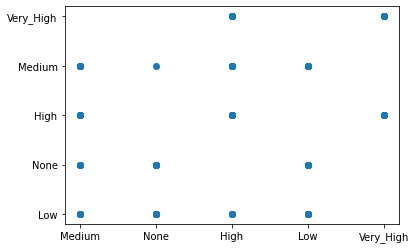

In [ ]:
plt.scatter(y_test,predictions)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.datasets import make_classification

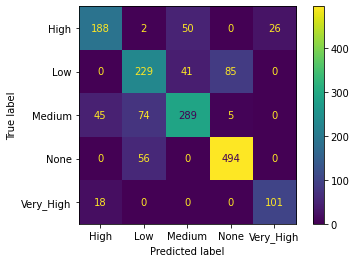

In [ ]:
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test)

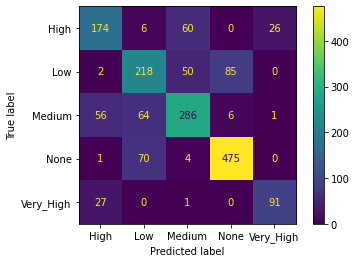

In [ ]:
ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test)

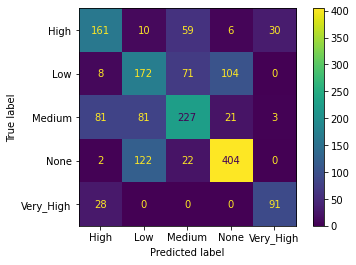

In [ ]:
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)

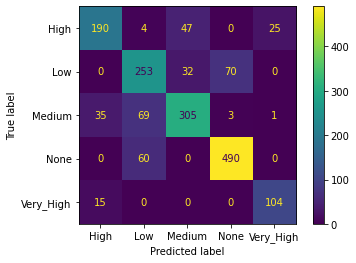

In [ ]:
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)

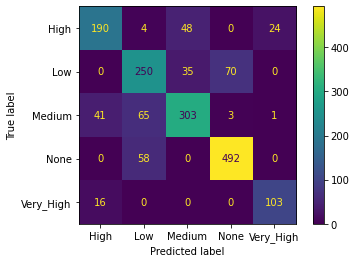

In [ ]:
ConfusionMatrixDisplay.from_estimator(best_clf_rf, X_test, y_test)

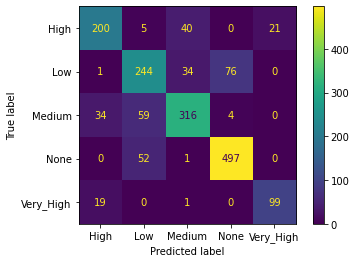

In [ ]:
ConfusionMatrixDisplay.from_estimator(best_clf_xgb, X_test, y_test)

In [ ]:
testing = pd.read_csv('workedTesting.csv')

In [ ]:
finalTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64 
 1   AVERAGE_HUMIDITY         6812 non-null   float64 
 2   AVERAGE_SPEED            6812 non-null   float64 
 3   AVERAGE_SPEED_DIFF       6812 non-null   category
 4   AVERAGE_SPEED_DIFF_Num   6812 non-null   float64 
 5   AVERAGE_TEMPERATURE      6812 non-null   float64 
 6   AVERAGE_TIME             6812 non-null   float64 
 7   AVERAGE_TIME_DIFF        6812 non-null   float64 
 8   AVERAGE_WIND_SPEED       6812 non-null   float64 
 9   DARK                     6812 non-null   uint8   
 10  LIGHT                    6812 non-null   uint8   
 11  LOW_LIGHT                6812 non-null   uint8   
 12  céu limpo                6812 non-null   uint8   
 13  céu pouco nublado        6812 non-null   uint8   
 14  day     

In [ ]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AVERAGE_ATMOSP_PRESSURE  1500 non-null   float64
 1   AVERAGE_HUMIDITY         1500 non-null   float64
 2   AVERAGE_SPEED            1500 non-null   float64
 3   AVERAGE_SPEED_DIFF_Num   1500 non-null   float64
 4   AVERAGE_TEMPERATURE      1500 non-null   float64
 5   AVERAGE_TIME             1500 non-null   float64
 6   AVERAGE_TIME_DIFF        1500 non-null   float64
 7   AVERAGE_WIND_SPEED       1500 non-null   float64
 8   DARK                     1500 non-null   int64  
 9   LIGHT                    1500 non-null   int64  
 10  LOW_LIGHT                1500 non-null   int64  
 11  céu limpo                1500 non-null   int64  
 12  céu pouco nublado        1500 non-null   int64  
 13  day                      1500 non-null   int64  
 14  hour                    

In [ ]:
testing[['AVERAGE_ATMOSP_PRESSURE','AVERAGE_HUMIDITY','AVERAGE_TEMPERATURE','AVERAGE_TIME_DIFF','AVERAGE_WIND_SPEED','AVERAGE_TIME','AVERAGE_SPEED','AVERAGE_SPEED_DIFF_Num']] = scaler.transform(testing[['AVERAGE_ATMOSP_PRESSURE','AVERAGE_HUMIDITY','AVERAGE_TEMPERATURE','AVERAGE_TIME_DIFF','AVERAGE_WIND_SPEED','AVERAGE_TIME','AVERAGE_SPEED','AVERAGE_SPEED_DIFF_Num']])

In [ ]:
prediction = best_clf_rf.predict(testing)

In [ ]:
sub_df = pd.read_csv('example_submission.csv')
final_data = {'RowId': sub_df.RowId, 'Speed_Diff': prediction}
submission = pd.DataFrame(data=final_data)

In [ ]:
submission['Speed_Diff'].value_counts()

None         474
Low          332
Medium       321
High         261
Very_High    112
Name: Speed_Diff, dtype: int64

In [ ]:
#pred = pd.DataFrame(prediction)
#sub_df = pd.read_csv('example_submission.csv')
#datasets=pd.concat([sub_df['RowId'],pred],axis=1)
#datasets.columns=['RowId','Speed_Diff']
#datasets

In [ ]:
compare = pd.read_csv('sample_submission.csv')

In [ ]:
compare['Speed_Diff'].value_counts()

None         495
Medium       326
Low          312
High         268
Very_High     99
Name: Speed_Diff, dtype: int64

In [ ]:
df1 = np.where(submission['Speed_Diff'] == compare['Speed_Diff'], 'True', 'False')
df1 = pd.DataFrame(df1)
df1.columns=['equals']
df1.value_counts()

equals
True      1378
False      122
dtype: int64

In [ ]:
submission.to_csv('submission.csv',index=False)